In [ ]:
from notebook_env import * 
images_dir = 'images'
import math

In [ ]:
epsilons_lin = np.linspace(1e-5, 1e-1, num = 20)
epsilons_log = np.logspace(-5,-1, num = 20)


In [ ]:
k_inner, k_outer = 5,5
n_reps = 1000
patience = n_reps*(1+k_inner)*k_outer/50
patience_list = np.linspace(n_reps*(1+k_inner)*k_outer/100, n_reps*(1+k_inner)*k_outer/10, num = 10)
quantiles = [0.7]

In [ ]:
# Define the experiment
def run_single_early_stopping_experiment(n_reps, quantiles, k_outer, k_inner, epsilon, patience):
    exp = nested_cv_intervals_with_early_stopping.CvIntervalsWithEarlyStoppingTest(n_reps,quantiles,k_outer,k_inner,epsilon,patience)
    mean_error, intervals, miscoverage_rates, total_fits, max_fits = exp.run()
    return mean_error, intervals, miscoverage_rates, total_fits, max_fits

def run_early_stopping_over_epsilons(epsilons, n_reps, quantiles, k_outer, k_inner, patience):
    results = {}
    for epsilon in epsilons:
        mean_error, intervals, miscoverage_rates, total_fits, max_fits = run_single_early_stopping_experiment(n_reps, quantiles, k_outer, k_inner, epsilon, patience)
        results[epsilon] = (epsilon, patience, mean_error, intervals, miscoverage_rates, total_fits, max_fits)
    return results

def run_early_stopping_over_patiences(patience_values, n_reps, quantiles, k_outer, k_inner, epsilon):
    results = {}
    for patience in patience_values:
        mean_error, intervals, miscoverage_rates, total_fits, max_fits = run_single_early_stopping_experiment(n_reps, quantiles, k_outer, k_inner, epsilon, patience)
        results[patience] = (epsilon, patience, mean_error, intervals, miscoverage_rates, total_fits, max_fits)
    return results

def nested_cv_stats(n_reps, quantiles, k_outer, k_inner):
    test = nested_cv_intervals.CvIntervalsTest(n_reps,quantiles,k_outer,k_inner)
    return test.run()

def classic_cv_stats(n_reps, quantiles):
    test = cv_intervals.CvIntervalsTest(n_reps,quantiles)
    miscoverage_rates = test.run()
    return miscoverage_rates

In [ ]:
res = run_early_stopping_over_epsilons(epsilons_log, n_reps, quantiles, k_outer, k_inner, patience)

In [ ]:
res_df = pd.DataFrame(res).T
res_df.columns = ['epsilon', 'patience', 'mean_error', 'intervals', 'miscoverage_rates', 'total_fits', 'max_fits']
res_df.index.name = 'epsilon'
res_df.head(20)

In [ ]:
#res_df.plot(x = 'epsilon', y = 'total_fits')

In [ ]:
# compute the stats of traditional classic and nested CV
_,_, ncv_miscoverage_rates  = nested_cv_stats(n_reps, quantiles, k_outer, k_inner)
cv_miscoverage_rates = classic_cv_stats(n_reps, quantiles)

In [ ]:

def plot_fits_and_miscoverage(res_df, quantile, ncv_miscoverage_rates, cv_miscoverage_rates, xaxis, logx=False):
    fig =plt.figure(figsize=(10,3))
    ax = fig.add_subplot(121)
    ax.plot(res_df[xaxis], res_df['total_fits'])
    ax.grid(alpha = 0.2)
    ax.set(
        xlabel = xaxis,
        ylabel = 'Total Model Fits',
        title = 'Total Model Fits with early stopping',
        ylim = (math.floor(res_df['total_fits'].min()/1e3)*1e3 ,math.ceil(res_df['total_fits'].max()/1e3)*1e3),
        xscale = 'log' if logx else 'linear'
    )
    
    ax = fig.add_subplot(122)
    miscoverage_rates = res_df['miscoverage_rates'].apply(lambda x: x[quantile])
    cv_miscoverage_rate = cv_miscoverage_rates[quantile]
    ncv_miscoverage_rate = ncv_miscoverage_rates[quantile]
    ax.plot(res_df[xaxis], miscoverage_rates, label = 'Miscoverage Rates')
    ax.axhline(cv_miscoverage_rate, color = 'green', linestyle = '--', label = 'CV Miscoverage Rate')
    ax.axhline(ncv_miscoverage_rate, color = 'red', linestyle = '--', label = 'Nested CV Miscoverage Rate')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 'small')
    ax.grid(alpha = 0.2)
    ax.set(
        xlabel = xaxis,
        ylabel = 'Miscoverage Rate',
        title = 'Miscoverage Rate with early stopping',
        xscale = 'log' if logx else 'linear'
    )
    plt.tight_layout()
    #plt.savefig(f'{images_dir}/early_stopping_fits_miscoverage_{xaxis}.pdf', dpi = 300)
    plt.show()
    

In [ ]:
plot_fits_and_miscoverage(res_df, 0.7, ncv_miscoverage_rates, cv_miscoverage_rates, xaxis= 'epsilon', logx=True)

In [ ]:
res_patience = run_early_stopping_over_patiences(patience_list, n_reps, quantiles, k_outer, k_inner, 1e-3)

In [ ]:
res_patience_df = pd.DataFrame(res_patience).T
res_patience_df.columns = ['epsilon', 'patience', 'mean_error', 'intervals', 'miscoverage_rates', 'total_fits', 'max_fits']
res_patience_df.index.name = 'patience'
res_patience_df.head(10)

In [ ]:
plot_fits_and_miscoverage(res_patience_df, 0.7, ncv_miscoverage_rates, cv_miscoverage_rates, 'patience', logx=False)

### Next experiment
Freeze epsilon and patience, vary the quantiles () and show a bar plot of the miscoverage
rates in cv,ncv,ncv-early stopping ; for each quantile

In [ ]:
epsilon = 1e-3
patience = 1e3
quantiles = [0.6, 0.7, 0.8,0.9,0.95]

In [ ]:
def run_early_stopping_over_quantiles(quantiles, n_reps, epsilon, patience, k_outer, k_inner):
    results = {}
    for quantile in quantiles:
        mean_error, intervals, miscoverage_rates, total_fits, max_fits = run_single_early_stopping_experiment(n_reps, [quantile], k_outer, k_inner, epsilon, patience)
        results[quantile] = (epsilon, patience, mean_error, intervals, miscoverage_rates, total_fits, max_fits)
    return results

In [ ]:
res_quantiles = run_single_early_stopping_experiment(n_reps, quantiles,  k_outer, k_inner, epsilon, patience)

In [ ]:
res_quants_df = pd.DataFrame(res_quantiles).T
res_quants_df.columns = ['mean_error', 'intervals', 'miscoverage_rates', 'total_fits', 'max_fits']
res_quants_df

In [ ]:
res_quants_df['miscoverage_rates']

In [ ]:
quantiles = [0.6, 0.7, 0.8,0.9,0.95]
_,_, ncv_miscoverage_rates  = nested_cv_stats(n_reps, quantiles, k_outer, k_inner)
cv_miscoverage_rates = classic_cv_stats(n_reps, quantiles)

In [ ]:
def plot_miscoverage_rates(quantiles, es_mr, ncv_miscoverage_rates, cv_miscoverage_rates):
    fig =plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    cv_mrs = cv_miscoverage_rates.values()
    ncv_mrs = ncv_miscoverage_rates.values()
    es_mrs  = es_mr.values()
    width = 0.2
    x = np.arange(len(quantiles))
    ax.bar(x - width, cv_mrs, width, label = 'CV Miscoverage Rate', edgecolor = 'black')
    ax.bar(x, es_mrs, width, label = 'Early Stopping Miscoverage Rate', edgecolor = 'black')
    ax.bar(x+width, ncv_mrs, width, label = 'Nested CV Miscoverage Rate', edgecolor = 'black')
    
    ax.grid(alpha = 0.2)
    ax.set_xticks(x, quantiles)
    ax.set(
        xlabel = 'Quantile',
        ylabel = 'Miscoverage Rate',
        title = 'Miscoverage Rates for all CV Mechanisms',
       # xticks = (x,quantiles)
    )
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'{images_dir}/early_stopping_quantiles_miscoverage.pdf', dpi = 300)
    plt.show()

In [ ]:
plot_miscoverage_rates(quantiles,res_quants_df['miscoverage_rates'][0], ncv_miscoverage_rates, cv_miscoverage_rates)

In [15]:
#res_df.plot(x = 'epsilon', y = 'total_fits')

In [7]:
# compute the stats of traditional classic and nested CV
_,_, ncv_miscoverage_rates  = nested_cv_stats(n_reps, quantiles, k_outer, k_inner)
cv_miscoverage_rates = classic_cv_stats(n_reps, quantiles)

Nested CV repetitions: 100%|██████████| 1000/1000 [00:30<00:00, 32.80it/s]


Estimated Prediction Error: 0.1158666066211999
Confidence Intervals:  {0.7: (0.11200143484004876, 0.11973177672305862)}


Simulations: 100%|██████████| 1000/1000 [00:02<00:00, 452.14it/s]


Confidence Interval Sizes:
Quantile: 0.70, Interval Size: 0.0245, Lower Bound: 0.1514, Upper Bound: 0.1760
Quantile: 0.80, Interval Size: 0.0303, Lower Bound: 0.1485, Upper Bound: 0.1789
Quantile: 0.90, Interval Size: 0.0389, Lower Bound: 0.1442, Upper Bound: 0.1832
Quantile: 0.95, Interval Size: 0.0464, Lower Bound: 0.1405, Upper Bound: 0.1869

Evaluating miscoverage rate for quantile: 0.7
Quantile 0.7: Within Interval = 581, Total Samples = 1000, Miscoverage Rate = 0.4190


In [5]:

def plot_fits_and_miscoverage(res_df, quantile, ncv_miscoverage_rates, cv_miscoverage_rates, xaxis, logx=False):
    fig =plt.figure(figsize=(10,3))
    ax = fig.add_subplot(121)
    ax.plot(res_df[xaxis], res_df['total_fits'])
    ax.grid(alpha = 0.2)
    ax.set(
        xlabel = xaxis,
        ylabel = 'Total Model Fits',
        title = 'Total Model Fits with early stopping',
        ylim = (math.floor(res_df['total_fits'].min()/1e3)*1e3 ,math.ceil(res_df['total_fits'].max()/1e3)*1e3),
        xscale = 'log' if logx else 'linear'
    )
    
    ax = fig.add_subplot(122)
    miscoverage_rates = res_df['miscoverage_rates'].apply(lambda x: x[quantile])
    cv_miscoverage_rate = cv_miscoverage_rates[quantile]
    ncv_miscoverage_rate = ncv_miscoverage_rates[quantile]
    ax.plot(res_df[xaxis], miscoverage_rates, label = 'Miscoverage Rates')
    ax.axhline(cv_miscoverage_rate, color = 'green', linestyle = '--', label = 'CV Miscoverage Rate')
    ax.axhline(ncv_miscoverage_rate, color = 'red', linestyle = '--', label = 'Nested CV Miscoverage Rate')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 'small')
    ax.grid(alpha = 0.2)
    ax.set(
        xlabel = xaxis,
        ylabel = 'Miscoverage Rate',
        title = 'Miscoverage Rate with early stopping',
        xscale = 'log' if logx else 'linear'
    )
    plt.tight_layout()
    #plt.savefig(f'{images_dir}/early_stopping_fits_miscoverage_{xaxis}.pdf', dpi = 300)
    plt.show()
    

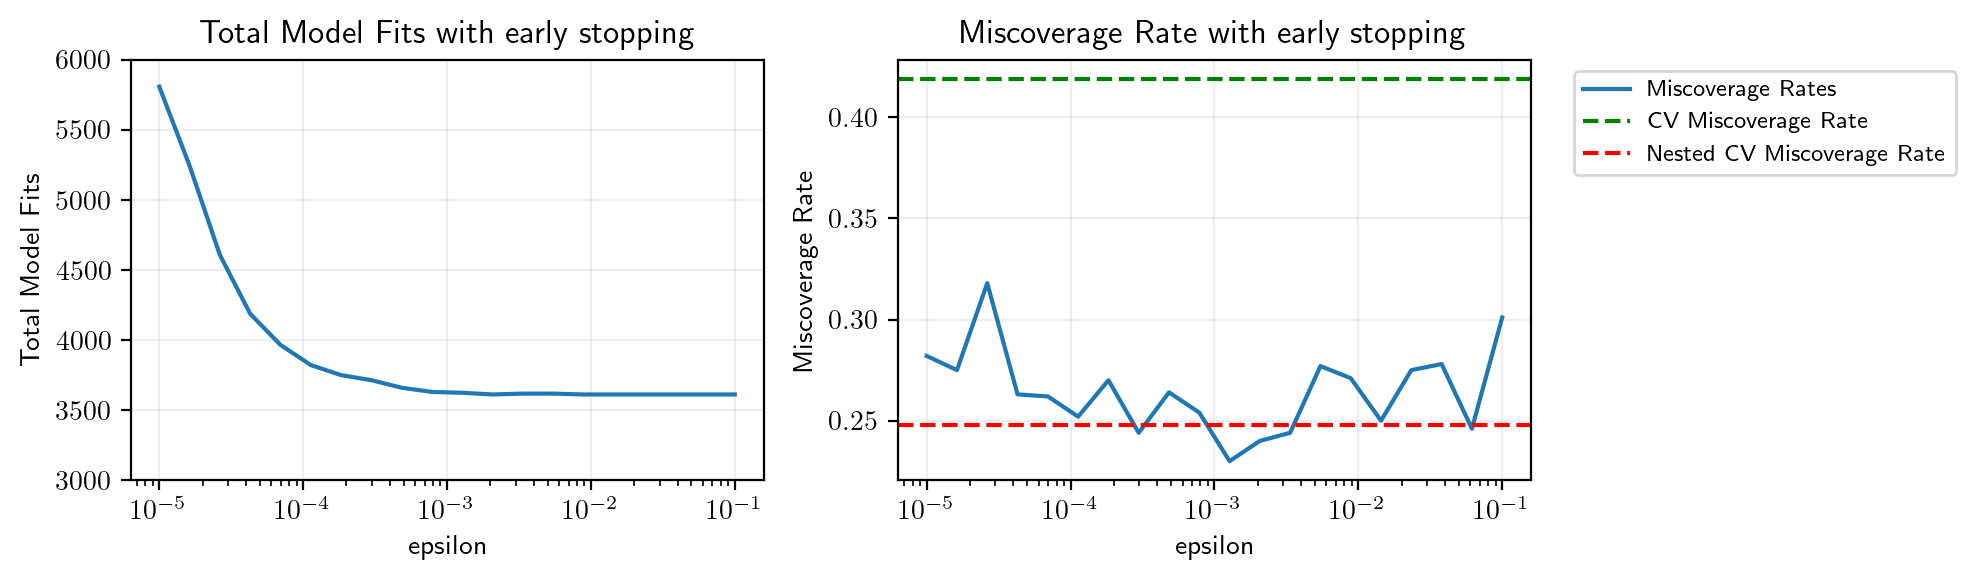

In [10]:
plot_fits_and_miscoverage(res_df, 0.7, ncv_miscoverage_rates, cv_miscoverage_rates, xaxis= 'epsilon', logx=True)

In [ ]:
res_patience = run_early_stopping_over_patiences(patience_list, n_reps, quantiles, k_outer, k_inner, 1e-3)

In [12]:
res_patience_df = pd.DataFrame(res_patience).T
res_patience_df.columns = ['epsilon', 'patience', 'mean_error', 'intervals', 'miscoverage_rates', 'total_fits', 'max_fits']
res_patience_df.index.name = 'patience'
res_patience_df.head(10)

,epsilon,patience,mean_error,intervals,miscoverage_rates,total_fits,max_fits
patience,,,,,,,
300.0,0.001,300.0,0.117586,"{0.7: (0.11385114084409817, 0.12132140395118607)}",{0.7: 0.244},1830,30000
600.0,0.001,600.0,0.117885,"{0.7: (0.11395493185035874, 0.12181569514621704)}",{0.7: 0.228},3630,30000
900.0,0.001,900.0,0.114765,"{0.7: (0.1109119761415716, 0.11861721246032798)}",{0.7: 0.262},5430,30000
1200.0,0.001,1200.0,0.117191,"{0.7: (0.11331717774572046, 0.12106532871588448)}",{0.7: 0.287},7236,30000
1500.0,0.001,1500.0,0.116684,"{0.7: (0.11292921166690137, 0.12043882439625811)}",{0.7: 0.265},9030,30000
1800.0,0.001,1800.0,0.113965,"{0.7: (0.11025335948805814, 0.11767606389836033)}",{0.7: 0.287},10830,30000
2100.0,0.001,2100.0,0.117342,"{0.7: (0.11357874354494592, 0.12110529631479171)}",{0.7: 0.272},12624,30000
2400.0,0.001,2400.0,0.113047,"{0.7: (0.10933417701301304, 0.1167600528136464)}",{0.7: 0.273},14436,30000
2700.0,0.001,2700.0,0.116457,"{0.7: (0.11272996923439078, 0.12018441686438207)}",{0.7: 0.243},16236,30000


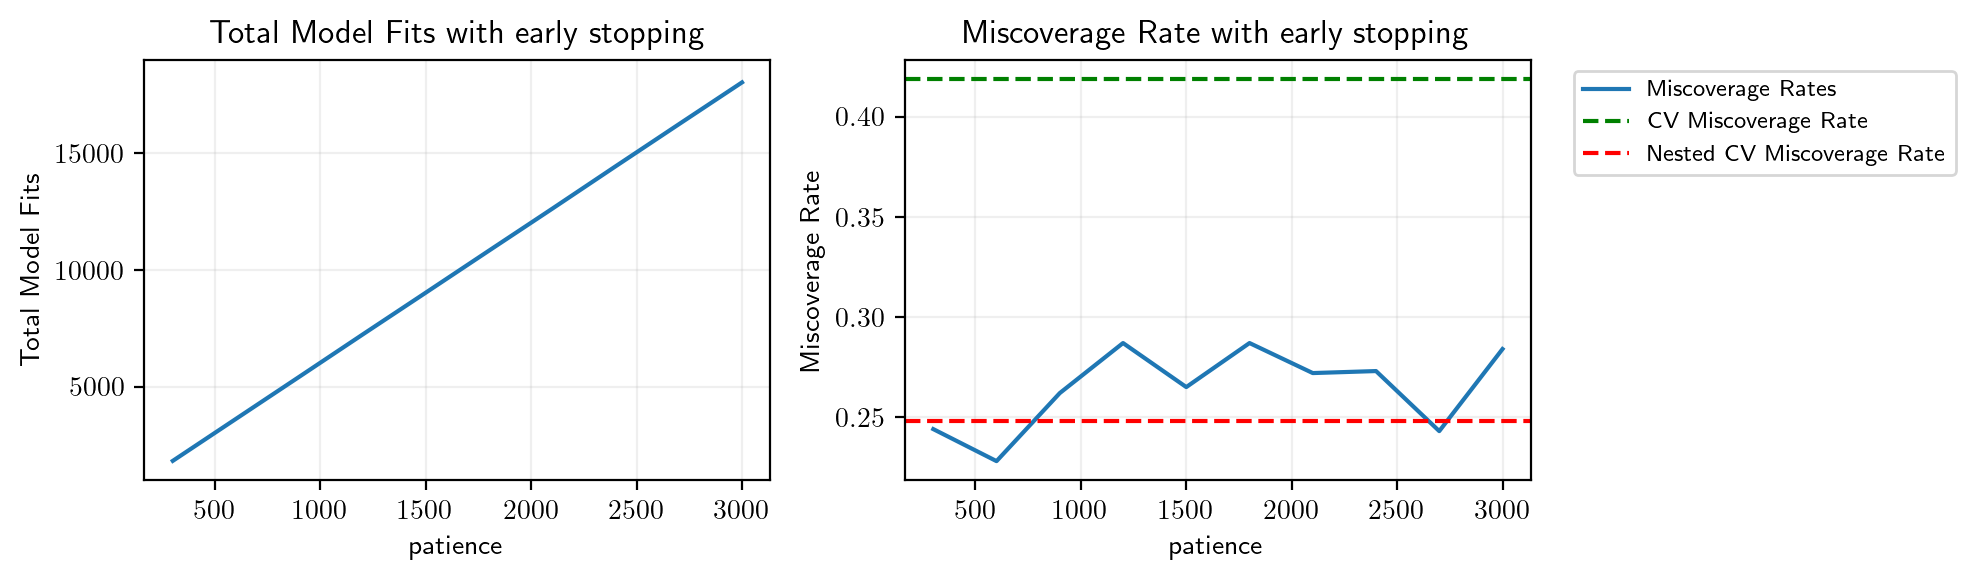

In [13]:
plot_fits_and_miscoverage(res_patience_df, 0.7, ncv_miscoverage_rates, cv_miscoverage_rates, 'patience', logx=False)

### Next experiment
Freeze epsilon and patience, vary the quantiles () and show a bar plot of the miscoverage
rates in cv,ncv,ncv-early stopping ; for each quantile

In [6]:
epsilon = 1e-3
patience = 1e3
quantiles = [0.6, 0.7, 0.8,0.9,0.95]

In [7]:
def run_early_stopping_over_quantiles(quantiles, n_reps, epsilon, patience, k_outer, k_inner):
    results = {}
    for quantile in quantiles:
        mean_error, intervals, miscoverage_rates, total_fits, max_fits = run_single_early_stopping_experiment(n_reps, [quantile], k_outer, k_inner, epsilon, patience)
        results[quantile] = (epsilon, patience, mean_error, intervals, miscoverage_rates, total_fits, max_fits)
    return results

In [8]:
res_quantiles = run_single_early_stopping_experiment(n_reps, quantiles,  k_outer, k_inner, epsilon, patience)

Nested CV repetitions: 100%|██████████| 1000/1000 [00:05<00:00, 173.54it/s]

Total fits performed: 6030 out of 30000 possible.
Estimated Prediction Error: 0.11463667335316798
Confidence Intervals: {0.6: (0.11165160765530494, 0.11762173799361511), 0.7: (0.11096064721137855, 0.1183126984375415), 0.8: (0.11009126119725689, 0.11918208445166316), 0.9: (0.10880270016038289, 0.12047064548853716), 0.95: (0.10768506562912888, 0.12158828001979116)}
Total Fits Performed: 6030 / 30000


In [9]:
res_quants_df = pd.DataFrame(res_quantiles).T
res_quants_df.columns = ['mean_error', 'intervals', 'miscoverage_rates', 'total_fits', 'max_fits']
res_quants_df

,mean_error,intervals,miscoverage_rates,total_fits,max_fits
0,0.114637,"{0.6: (0.11165160765530494, 0.1176217379936151...","{0.6: 0.376, 0.7: 0.255, 0.8: 0.168, 0.9: 0.06...",6030,30000


In [21]:
res_quants_df['miscoverage_rates']

0    {0.6: 0.376, 0.7: 0.255, 0.8: 0.168, 0.9: 0.06...
Name: miscoverage_rates, dtype: object

In [11]:
quantiles = [0.6, 0.7, 0.8,0.9,0.95]
_,_, ncv_miscoverage_rates  = nested_cv_stats(n_reps, quantiles, k_outer, k_inner)
cv_miscoverage_rates = classic_cv_stats(n_reps, quantiles)

Nested CV repetitions: 100%|██████████| 1000/1000 [00:25<00:00, 39.86it/s]


Estimated Prediction Error: 0.1166025121233752
Confidence Intervals:  {0.6: (0.11344953457969582, 0.11975548828598177), 0.7: (0.11271970720150362, 0.12048531566417398), 0.8: (0.11180141770910113, 0.12140360515657647), 0.9: (0.11044037435061538, 0.12276464851506222), 0.95: (0.1092598722149402, 0.1239451506507374)}


Simulations: 100%|██████████| 1000/1000 [00:01<00:00, 537.45it/s]


Confidence Interval Sizes:
Quantile: 0.60, Interval Size: 0.0199, Lower Bound: 0.1537, Upper Bound: 0.1737
Quantile: 0.70, Interval Size: 0.0245, Lower Bound: 0.1514, Upper Bound: 0.1760
Quantile: 0.80, Interval Size: 0.0303, Lower Bound: 0.1485, Upper Bound: 0.1789
Quantile: 0.90, Interval Size: 0.0389, Lower Bound: 0.1442, Upper Bound: 0.1832
Quantile: 0.95, Interval Size: 0.0464, Lower Bound: 0.1405, Upper Bound: 0.1869

Evaluating miscoverage rate for quantile: 0.6
Quantile 0.6: Within Interval = 494, Total Samples = 1000, Miscoverage Rate = 0.5060

Evaluating miscoverage rate for quantile: 0.7
Quantile 0.7: Within Interval = 581, Total Samples = 1000, Miscoverage Rate = 0.4190

Evaluating miscoverage rate for quantile: 0.8
Quantile 0.8: Within Interval = 688, Total Samples = 1000, Miscoverage Rate = 0.3120

Evaluating miscoverage rate for quantile: 0.9
Quantile 0.9: Within Interval = 809, Total Samples = 1000, Miscoverage Rate = 0.1910

Evaluating miscoverage rate for quantile: 0

In [40]:
def plot_miscoverage_rates(quantiles, es_mr, ncv_miscoverage_rates, cv_miscoverage_rates):
    fig =plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    cv_mrs = cv_miscoverage_rates.values()
    ncv_mrs = ncv_miscoverage_rates.values()
    es_mrs  = es_mr.values()
    width = 0.2
    x = np.arange(len(quantiles))
    ax.bar(x - width, cv_mrs, width, label = 'CV Miscoverage Rate', edgecolor = 'black')
    ax.bar(x, es_mrs, width, label = 'Early Stopping Miscoverage Rate', edgecolor = 'black')
    ax.bar(x+width, ncv_mrs, width, label = 'Nested CV Miscoverage Rate', edgecolor = 'black')
    
    ax.grid(alpha = 0.2)
    ax.set_xticks(x, quantiles)
    ax.set(
        xlabel = 'Quantile',
        ylabel = 'Miscoverage Rate',
        title = 'Miscoverage Rates for all CV Mechanisms',
       # xticks = (x,quantiles)
    )
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'{images_dir}/early_stopping_quantiles_miscoverage.pdf', dpi = 300)
    plt.show()

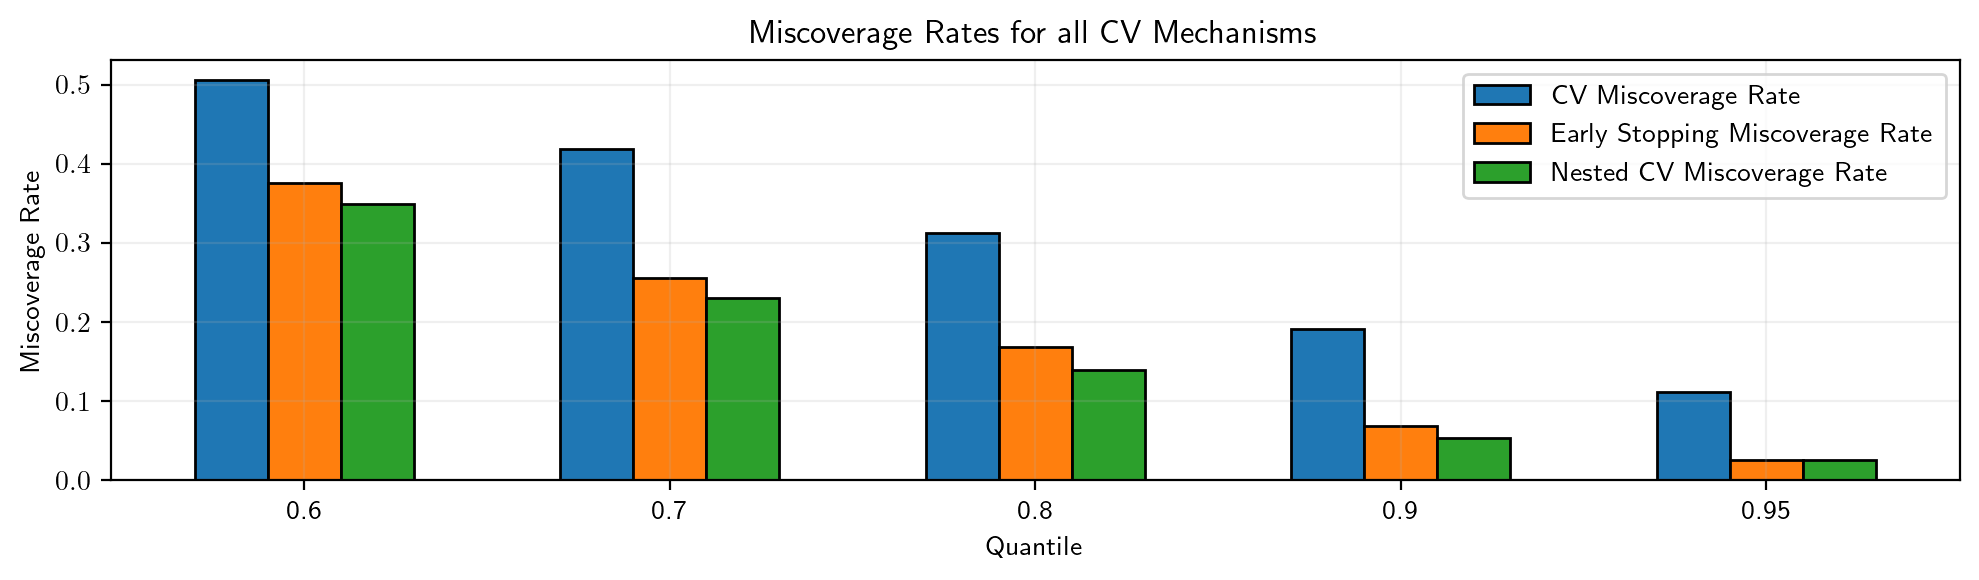

In [41]:
plot_miscoverage_rates(quantiles,res_quants_df['miscoverage_rates'][0], ncv_miscoverage_rates, cv_miscoverage_rates)